# Project 2

## Purpose

I have two goals for this project:

1. Implement and backtest a 52-week high/low breakout strategy in Python
2. Compare and contrast performance, *explaining any differences*

## Assignment

Evaluate a 52-week high/low breakout strategy against a passive buy-and-hold approach.
Compare and contrast the strategy on the Dow-Jones Industrial Average (DJIA) ETF, an equal-weighted portfolio of the strategy on the DJIA constituents,[^ew] and buying-and-holding the DJIA ETF (ticker `DIA`).
*Explain any differences among the three, and recommend one.*

Here is the strategy:

- *Long Position:*
    - *Entry:* Price at the 52-week high and volume more than 1.5 times the 20-day simple moving average
    - *Exit:* Price falls 5% below the entry price or 20 days, whichever comes first
- *Short:*
    - *Entry:* Price at the 52-week low and volume more than 1.5 times the 20-day simple moving average
    - *Exit:* Price rises 5% above the entry price or 20 days, whichever comes first
- *Otherwise:*
    - Hold cash and earn the risk-free rate of return

Here are ideas to consider:

1. Use the provided dataset for the current DJIA constituents, a DJIA ETF (ticker `DIA`), and the Fama-French factors
2. At a minimum, compare total returns and Sharpe Ratios
3. You might also explore maximum drawdowns, subsamples, rolling windows, trade frequencies, the volume confirmation, *plus any other compelling insights*
4. Title, label, and caption your figures and tables, referencing them in your summary

[^ew]: Here equal-weighted portfolio means that you find the position for all the DJIA constituents.
If you are long stocks 1, 2, and 3, and you are short stock 4. then your portfolio return would be:
$r_p = \frac{r_1 + r_2 + r_3 - r_4}{4}$.

## Criteria

@tbl-grading-rubric provides the project grading rubric.
The project is worth 200 points.
The peer reviews are worth 100 points, and students will receive their median score.
Almost all students earn perfect peer review scores, so I will factor that into project scores.
For example, a project score *without peer review scores* of $77.5\%$ converts to a project score *with perfect peer review scores* of $85\%$ because $\frac{0.775 \times 200 + 1.00 \times 100}{300} = 0.85 = 85\%$.

| Topic | Points |
|:------|:-------|
| Clarity, correctness, and completeness of calculations          |  60 |
| Clarity, correctness, and completeness of visualizations        |  60 |
| Clarity, correctness, and completeness of discussions           |  60 |
| Correctness of submission according to the deliverables section |  20 |
| Total                                                           | 200 |

: This table provides the project grading rubric  {#tbl-grading-rubric tbl-colwidths="[90,10]"}

## Deliverables

Upload the following as unzipped files to Canvas by 11:59 PM on 3/28:

1. One Jupyter notebook that contains your report and performs *all* your analysis
   1. Name this file `project_2.ipynb` for me to run your code
   2. Your notebook must run on my computer; I will place the data files in the same folder as your notebook
   3. You may not edit the Word documents after you create them
2. One Quarto-generated Word document *without code* for our partner to review
   1. Name this file `project_2_without_code.docx`
   2. Typing `echo: false` in the first cell of this Jupyter notebook hides code in your Word document
3. One Quarto-generated Word document *with code* for me to grade
   1. Name this file `project_2_with_code.docx`
   2. Typing `echo: true` in the first cell of this Jupyter notebook displays code in your Word document

Here is some additional guidance:

1. Provide an up to three-page executive summary at the start of your report, *which is the only writing I will read*
2. Your Word document *without code* must not exceed 15 pages in length
3. Your submission must not include your name

## Data

This project requires two data files.
Save these data files in the same folder as your `project_2.ipynb` notebook file.

1. `data_djia.csv` provides long-formatted data from Yahoo! Finance for the current DJIA companies, plus a DJIA ETF (ticker `DIA`), from 1998-01-20 through 2024-12-31
2. `data_ff3` provides factor data from Kenneth French's data library (name `F-F_Research_Data_Factors_daily`), for the same period

You can read these data files as follows.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

In [2]:
djia = (
    pd.read_csv(
        filepath_or_buffer='data_djia.csv',
        index_col=['Ticker', 'Date'],
        parse_dates=['Date']
    )
    .sort_index()
    .rename_axis(columns=['Variable'])
)

In [3]:
ff3 = (
    pd.read_csv(
        filepath_or_buffer='data_ff3.csv',
        index_col=['Date'],
        parse_dates=['Date']
    )
    .sort_index()
    .rename_axis(columns=['Variable'])
)

## Quarto

### Basics

1. Use [Quarto](https://quarto.org/) to generate your Word document from your notebook
2. Use `#` to create a title and `##` to create sections
3. Use `-` or `1.` to create lists
4. Use the first cell in this notebook to hide or display code with `echo=false` or `echo=true`, respectively
5. This first cell must be a `raw` cell instead of a `code` or `markdown` cell
6. Use `quarto render project_1.ipynb` in the same folder as your notebook to render it to a Word document
7. Use the `cd` command in the terminal to change the working directory to the directory with your notebook

### Examples

This section provides a sample analysis highlighting how code and formatting work with Quarto.
@fig-line-plot provides a line plot of the value of a $10,000 investment in DIA, the DJIA ETF.
Note that `#| label:` and `#| fig-cap:` comments at the top of the figure cell create the figure reference/link and the figure caption, respectively.
You can learn more about cross-referencing figures and tables [here](https://quarto.org/docs/authoring/figures.html).

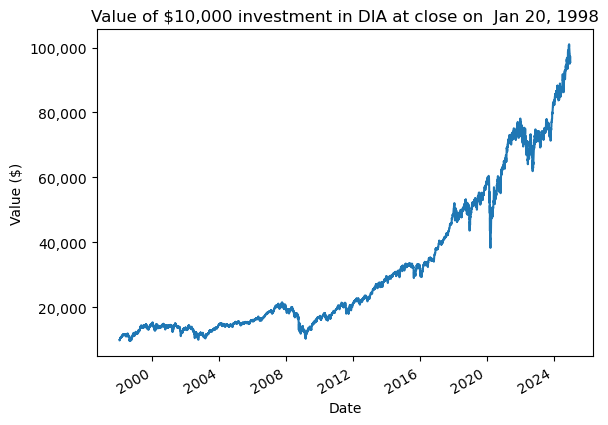

In [4]:
#| label: fig-line-plot
#| fig-cap: "This line plot shows the value of a $10,000 investment in the DJIA ETF at the close of its first day of trading"

(
    djia
    .loc['DIA']
    ['Adj Close']
    .pct_change()
    .add(1)
    .cumprod()
    .mul(10_000)
    .plot()
)
plt.ylabel('Value ($)')
plt.title(f'Value of $10,000 investment in DIA at close on {djia.loc['DIA'].index[0]: %b %d, %Y}')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

## Artificial Intelligence (AI)

You may use AI (e.g., ChatGPT) to *help* you prepare your analysis and discussion.
However:

1. AI will not do very well on this project without significant input from your team
2. AI will not be a defense against plagiarism because AI should not *write* your code and slides; If you plagiarize an AI that plagiarizes other sources, you are responsible for plagiarizing the AI and its sources